IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

UPLOAD STORE DATASET

In [ ]:
df=pd.read_csv('//content/store.csv')

In [ ]:
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
df.shape # to check the shape of dataset

(1115, 10)

In [ ]:
df.columns ## to check the columns of dataset

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
df.describe() ### to check the description of dataset

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


INSIGHTS:


* Some stores have extremely high competition distances (up to 75.86 km), suggesting they may be in remote locations.

* Many stores lack competition data, indicating missing or incomplete records.

* A significant number of stores do not participate in Promo2.





In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
df.isnull().sum() # to checking null value od store dataset

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,3
CompetitionOpenSinceMonth,354
CompetitionOpenSinceYear,354
Promo2,0
Promo2SinceWeek,544
Promo2SinceYear,544
PromoInterval,544


In [ ]:
#Handle null values of numeric data types

df['CompetitionDistance'].fillna(df['CompetitionDistance'].mean(),inplace=True)
df['CompetitionOpenSinceMonth'].fillna(df['CompetitionOpenSinceMonth'].mean(),inplace=True)
df['CompetitionOpenSinceYear'].fillna(df['CompetitionOpenSinceYear'].mean(),inplace=True)
df['Promo2SinceWeek'].fillna(df['Promo2SinceWeek'].mean(),inplace=True)
df['Promo2SinceYear'].fillna(df['Promo2SinceYear'].mean(),inplace=True)


In [ ]:
#handle null value of object type
df['PromoInterval'].fillna(df['PromoInterval'].mode()[0],inplace=True)

In [ ]:
#after handle checking null value again
df.isnull().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,0
CompetitionOpenSinceMonth,0
CompetitionOpenSinceYear,0
Promo2,0
Promo2SinceWeek,0
Promo2SinceYear,0
PromoInterval,0


<Axes: xlabel='CompetitionDistance', ylabel='Count'>

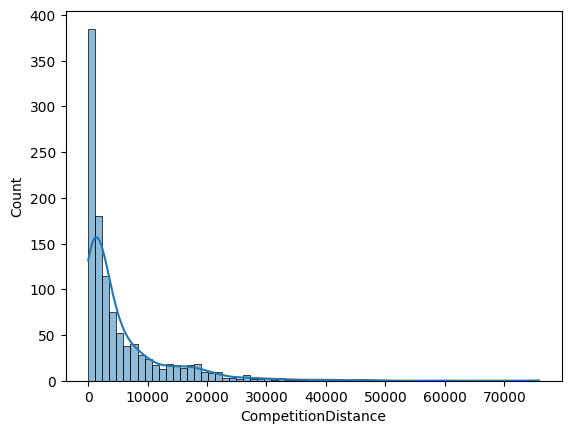

In [ ]:
sns.histplot(df['CompetitionDistance'],kde=True)

Observations:

This graph is a histogram with a KDE (Kernel Density Estimation) plot overlaid, showing the distribution of CompetitionDistance (distance to the nearest competitor).



* Most stores have a competitor very close (below ~5,000 meters or 5 km).

* A few stores have extremely high competition distances (up to 75,000 meters or 75 km), but these are rare.

* Some stores are far from competitors, indicating potential remote locations or less dense markets.



# Exploration of customer purchasing behaviour-




In [ ]:
#Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?


In [ ]:
train = pd.read_csv('/content/train.csv', on_bad_lines='skip') # load training data

In [ ]:
test=pd.read_csv('/content/test.csv')#  load testing data

In [ ]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
train.shape

(1017209, 9)

In [ ]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [ ]:
test.shape

(41088, 8)

In [ ]:
# #check distibution of promtion in both train and test
train['Promo'].value_counts()


,count
Promo,
0,629129
1,388080


Training Set:
 Promo
0    0.618485
1    0.381515
Name: proportion, dtype: float64

Test Set:
 Promo
0    0.604167
1    0.395833
Name: proportion, dtype: float64


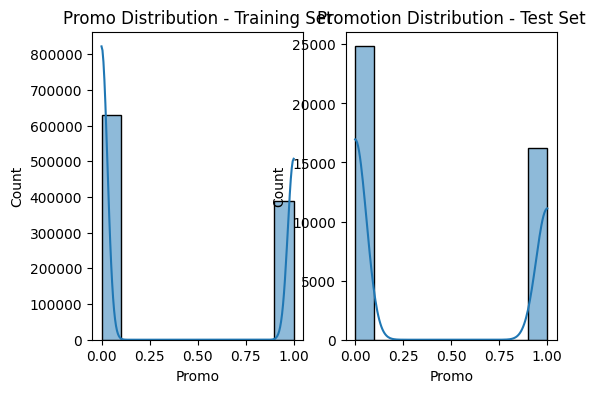

In [ ]:
# # Check distribution of promotions
print("Training Set:\n", train["Promo"].value_counts(normalize=True))
print("\nTest Set:\n", test["Promo"].value_counts(normalize=True))

# Visualize the distribution
fig, axes = plt.subplots(1, 2, figsize=(6, 4))

sns.histplot(train["Promo"], ax=axes[0], kde=True, bins=10)
axes[0].set_title("Promo Distribution - Training Set")

sns.histplot(test["Promo"], ax=axes[1], kde=True, bins=10)
axes[1].set_title("Promotion Distribution - Test Set")

plt.show()

Key Observations:

Training Set-Most data points have Promo = 0, meaning the majority of stores were not running promotions.
A significant but smaller portion has Promo =1 (stores running promotions)

Test Set-Similar pattern to the training set.
The proportion of stores without promotions (Promo = 0) is still larger, but the gap between the two categories is slightly smaller.

The distribution of Promo is imbalanced, with more stores not running promotions.

The pattern in the test set closely matches the training set, which is good for modeling.

In [ ]:
train.isnull().sum().sort_values(ascending=False)

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


In [ ]:
train.shape

(1017209, 9)

In [ ]:
train.isnull().sum().sort_values(ascending=False)

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


In [ ]:
#Check & compare sales behavior before, during and after holidays

# Define holiday-related periods
train["Before_Holiday"] = train["StateHoliday"].shift(-1).fillna("0")
train["After_Holiday"] = train["StateHoliday"].shift(1).fillna("0")
train["During_Holiday"] = train["StateHoliday"]
train["During_Holiday"] = train["During_Holiday"].apply(lambda x: "0" if x in ["a", "b", "c"] else x)

In [ ]:
# Aggregate sales based on holiday status
sales_before = train[train["Before_Holiday"] != "0"]["Sales"]
sales_during = train[train["During_Holiday"] != "0"]["Sales"]
sales_after = train[train["After_Holiday"] != "0"]["Sales"]


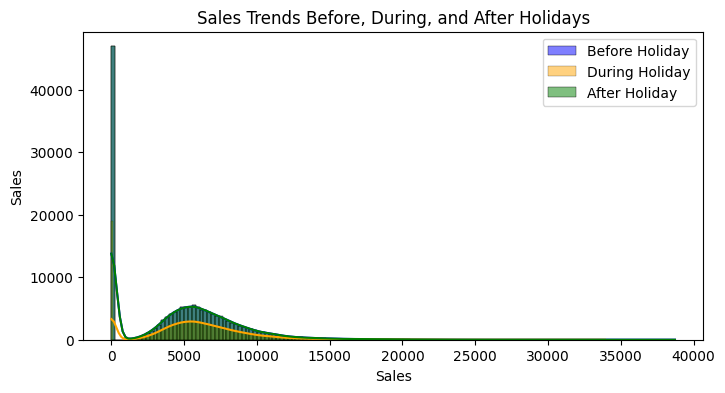

In [ ]:
# # Plot sales trends using Seaborn
plt.figure(figsize=(8, 4))
sns.histplot(sales_before, color='blue', label='Before Holiday', kde=True)
sns.histplot(sales_during, color='orange', label='During Holiday', kde=True)
sns.histplot(sales_after, color='green', label='After Holiday', kde=True)

plt.ylabel("Sales")
plt.title("Sales Trends Before, During, and After Holidays")
plt.legend()  # Show the legend
plt.show()

This graph is a sales distribution plot showing sales trends before, during, and after holidays. The three distributions are overlaid in different colors, with a legend indicating:

Sales Trends Around Holidays--

Before Holidays (Blue):
Moderate distribution, showing a mix of sales levels.

During Holidays (Orange):
Appears to have a slightly lower peak, suggesting reduced store activity (possibly due to store closures).

After Holidays (Green):
Sales seem to bounce back after holidays, following a similar trend as before.

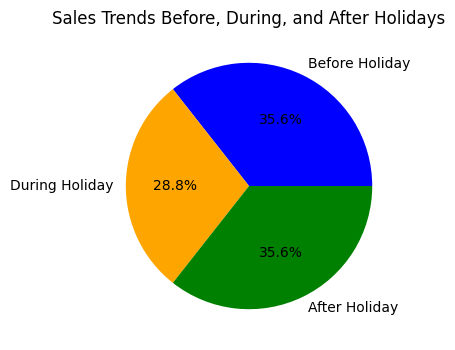

In [ ]:
#making pie chart of before Holiday,After Holidays,during holiday
plt.figure(figsize=(8, 4))
plt.pie([len(sales_before), len(sales_during), len(sales_after)],
        labels=["Before Holiday", "During Holiday", "After Holiday"],
        colors=["blue", "orange", "green"],
        autopct="%1.1f%%")
plt.title("Sales Trends Before, During, and After Holidays")
plt.show()

Lower Sales During Holidays:

The "During Holiday" section (28.8%) is smaller, indicating that sales tend to drop on holidays.
This could be due to store closures or reduced customer traffic.

Sales Before and After Holidays are Similar:

Before Holiday (35.6%) and After Holiday (35.6%) have equal proportions, suggesting that sales return to normal levels after the holiday.

#Find out any seasonal (Christmas, Easter etc) purchase behaviour

In [ ]:
#train['Date'].unique()

In [ ]:
#Convert Date column to datetime format
train["Date"] = pd.to_datetime(train["Date"])
train["Date"]

,Date
0,2015-07-31
1,2015-07-31
2,2015-07-31
3,2015-07-31
4,2015-07-31
...,...
1017204,2013-01-01
1017205,2013-01-01
1017206,2013-01-01
1017207,2013-01-01


In [ ]:
#Convert Date column to datetime format
train["Date"] = pd.to_datetime(train["Date"])

holidays = ["2014-12-25", "2015-12-25",  #  assuming these holidays-Christmas
            "2014-04-20", "2015-04-05",  # Easter
            "2014-11-28", "2015-11-27"]  # Black Friday



In [ ]:
# Convert to datetime for filtering
holidays = pd.to_datetime(holidays)

# Create a column to indicate if a sale happened near a holiday
train["Holiday_Period"] = train["Date"].apply(lambda x: "Holiday" if x in holidays
                                                     else ("Before Holiday" if any((x - pd.Timedelta(days=7)) == h for h in holidays)
                                                           else ("After Holiday" if any((x + pd.Timedelta(days=7)) == h for h in holidays)
                                                                 else "Regular")))



In [ ]:
# Create a column to indicate if a sale happened near a holiday
train["Holiday_Period"] = train["Date"].apply(lambda x: "Holiday" if x in holidays
                                                     else ("Before Holiday" if any((x - pd.Timedelta(days=7)) == h for h in holidays)
                                                           else ("After Holiday" if any((x + pd.Timedelta(days=7)) == h for h in holidays)
                                                                 else "Regular")))



In [ ]:
 #Group and analyze sales behavior around holidays
seasonal_sales = train.groupby("Holiday_Period")["Sales"].agg(["mean", "median"])

# Print summary statistics
print(seasonal_sales)

                       mean  median
Holiday_Period                     
After Holiday   3924.986098     0.0
Before Holiday  2429.113084     0.0
Holiday         2373.687317     0.0
Regular         5809.486397  5765.0


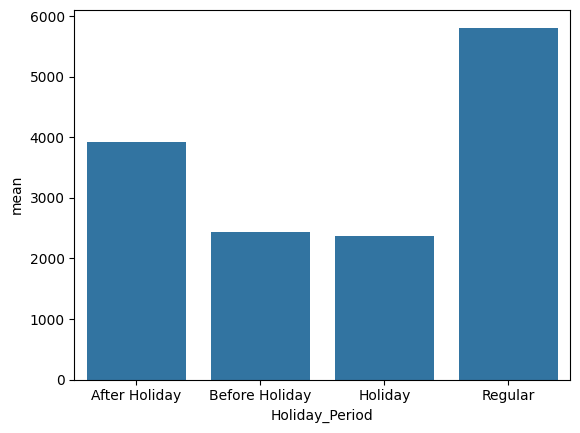

In [ ]:
plot=sns.barplot(x=seasonal_sales.index,y=seasonal_sales['mean'])

Insights:
Holidays negatively impact sales, likely due to store closures or reduced shopping activity.

The post-holiday period sees a rebound, suggesting a strategic opportunity for promotions.

Regular days are crucial for revenue, so stores should optimize pricing, promotions, and stock levels accordingly.

What can you say about the correlation between sales and number of
customers?

In [ ]:
correlation=train['Sales'].corr(train['Customers'])
correlation

0.8947107733017032

How does promo affect sales? Are the promos attracting more customers? H
does it affect already existing custome

In [ ]:
#How does promo affect sales? Are the promos attracting more customers? does it affect already existing custome
#promo effect seles customer
train.groupby('Promo')[['Sales', 'Customers']].mean()

,Sales,Customers
Promo,,
0,4406.050805,517.823542
1,7991.152046,820.098815


<Axes: xlabel='Promo', ylabel='Sales'>

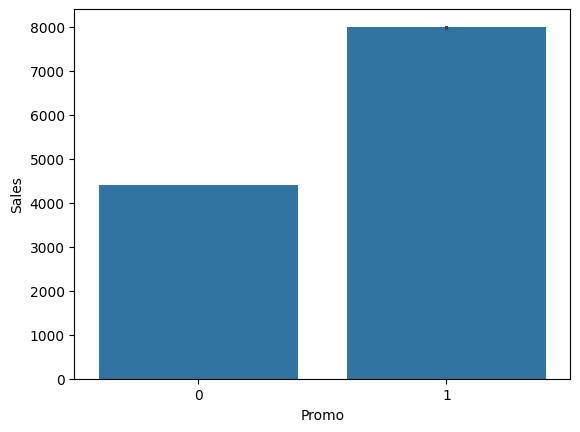

In [ ]:
sns.barplot(x='Promo',y='Sales',data=train)

<Axes: xlabel='Promo', ylabel='Customers'>

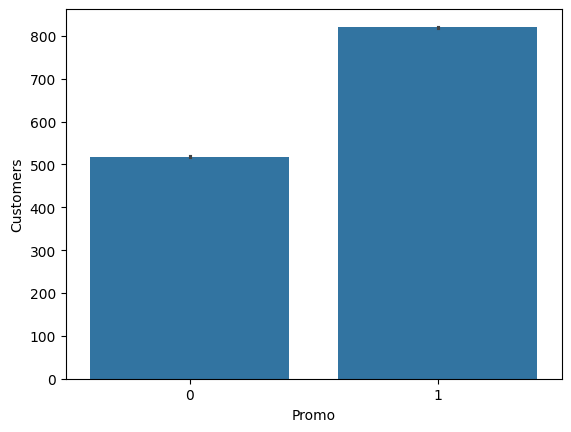

In [ ]:
sns.barplot(x='Promo',y='Customers',data=train)

When Promo = 1(promotion active), the average number of customers is around 800.

When Promo = 0 (no promotion), the average number of customers is around 500.

Promotions are effective in attracting more customers.

Higher customer numbers may lead to increased sales, but further analysis is needed to confirm the effect on revenue.

To maximize profitability, stores should analyze whether the increase in customers outweighs the cost of running promotions.

<Axes: xlabel='Promo', ylabel='Sales'>

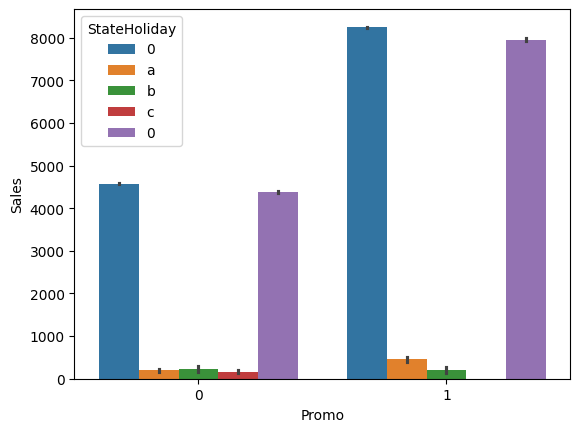

In [ ]:
sns.barplot(x='Promo',y='Sales',hue='StateHoliday',data=train)

This bar chart shows sales performance based on promotions (Promo: 0 or 1) and whether a state holiday (StateHoliday: 0, a, b, c) was occurring
Promotions work best on regular days (StateHoliday = 0).

State holidays reduce sales, even with promotions, suggesting lower customer activity during holidays.
*italicized text*
Stores might need alternative strategies for boosting sales on holidays, such as special holiday promotions or online sales strategies.

In [ ]:
#Could the promos be deployed in more effective ways? Which stores should promos be deployed in?
effect_of_promo=train.groupby('Store')[['Sales','Customers']].mean()
effect_of_promo


,Sales,Customers
Store,,
1,3945.704883,467.646497
2,4122.991507,486.045648
3,5741.253715,620.286624
4,8021.769639,1100.057325
5,3867.110403,444.360934
...,...,...
1111,4342.968153,373.548832
1112,8465.280255,693.498938
1113,5516.180467,596.763270


In [ ]:
# Trends of customer behavior during store open and closing times
trend_of_customer=train.groupby('Open')[['Customers']].mean()
trend_of_customer

,Customers
Open,
0,0.000000
1,762.728395


0 means store closed than no customer behaviour is also not responding
and 1 mean store is open and customer sale is increasing .

#Which stores are opened on all weekdays? How does that affect their sales weekends?

In [ ]:
weekdays=train.groupby('DayOfWeek')[['Sales']].mean()
weekdays

,Sales
DayOfWeek,
1,7809.044510
2,7005.244467
3,6555.884138
4,6247.575913
5,6723.274305
6,5847.562599
7,204.183189


<Axes: xlabel='StoreType', ylabel='Sales'>

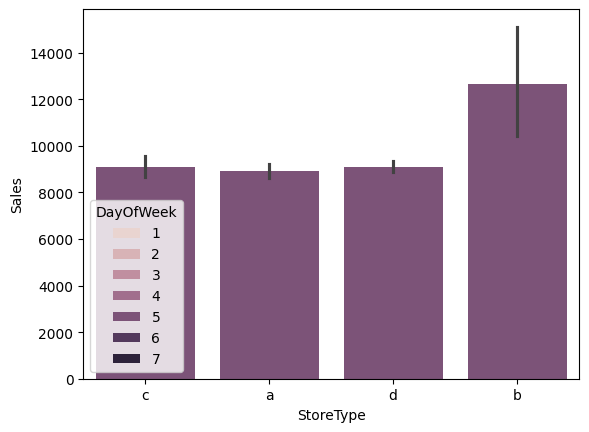

In [ ]:
sns.barplot(x=df["StoreType"], y=train['Sales'], hue=train["DayOfWeek"])

This bar chart presents sales performance across different store types (a, b, c, d) while considering the Day of the Week as a factor.

Store Type 'b' could be a high-performing category, possibly due to larger store sizes, better locations, or high customer demand.

Other store types (a, c, d) have stable sales patterns, meaning they might cater to a more consistent customer base.

Sales forecasting for Store Type 'b' may require more analysis since it has higher variance, meaning promotions, seasonality, or location differences may be factors.

<Axes: xlabel='Open', ylabel='Sales'>

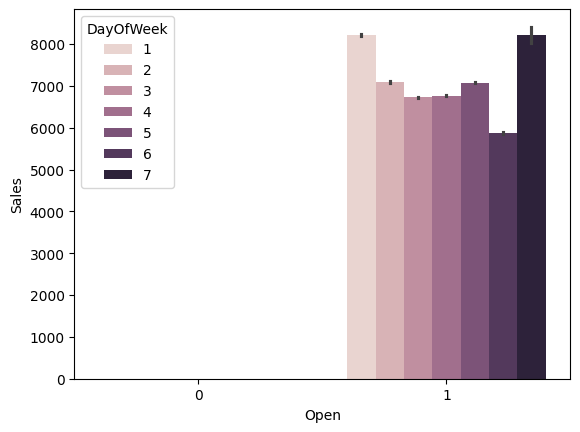

In [ ]:
sns.barplot(x=train["Open"],y=train['Sales'],hue=train["DayOfWeek"])

#- Open suggests that whether the store was open or closed for refurbishment and weekends or holidays


This bar chart visualizes sales performance based on whether stores are open or closed, categorized by the day of the week.

Stores generate revenue only when open, and the variation across days suggests that certain days (Monday & Sunday) attract more customers.

Thursday (Day 5) has relatively lower sales, which could mean reduced
foot traffic or lower demand on this day.

Further analysis could focus on why certain days perform better—it could be due to factors like promotions, customer behavior, or external influences (holidays, salary cycles, etc.).

<Axes: xlabel='Open', ylabel='count'>

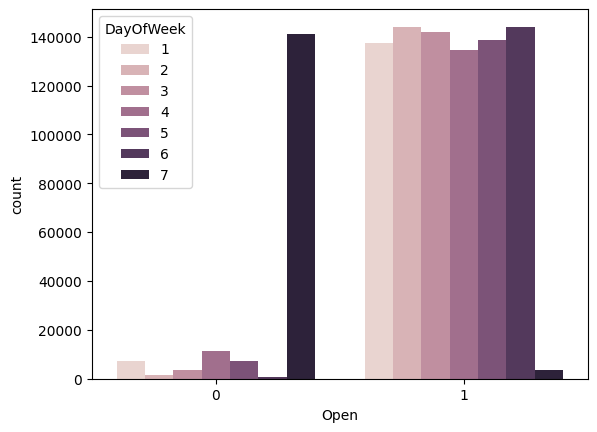

In [ ]:
sns.countplot(x=train["Open"], hue=train["DayOfWeek"])




This bar chart visualizes the count of store openings and closings across different days of the week.

The business operations follow a weekly pattern, where most stores operate regularly except on Sundays.

The variation in store openings could impact weekly sales trends—Sundays might show lower total sales due to fewer operational stores.

If customer demand is high on Sundays, it might be worth exploring whether keeping more stores open on this day would be profitable.

<Axes: xlabel='StoreType', ylabel='Sales'>

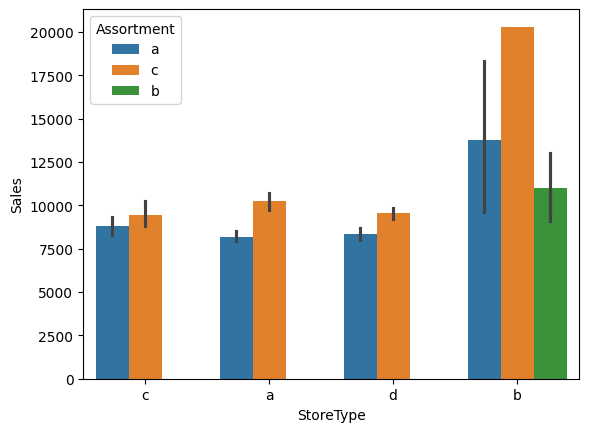

In [ ]:
sns.barplot(x=df["StoreType"],y=train['Sales'],hue=df["Assortment"])

Observation:
The above bar plot shows that the store types a, c and d have only assortment level a and c. On the other hand the store type b has all the three kinds of assortment strategies, a reason why average sales were high for store type b stores.

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

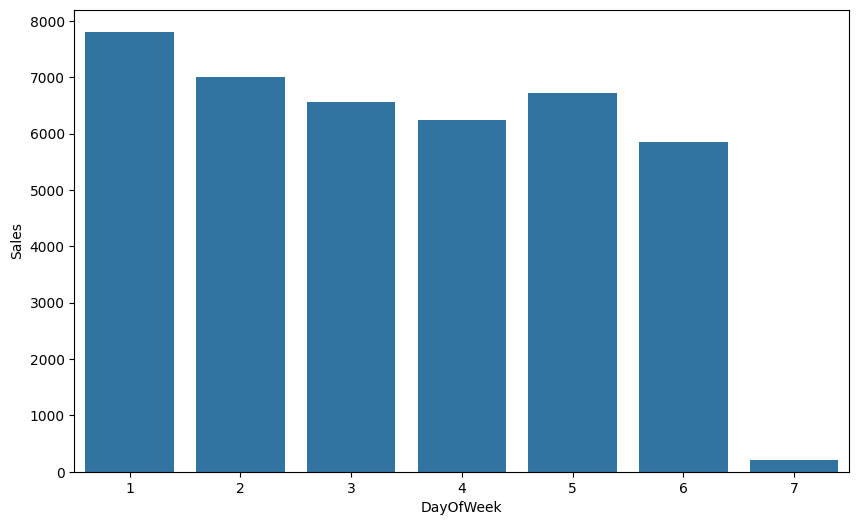

In [ ]:
# #plotting to visualize
plt.figure(figsize=(10,6))
sns.barplot(x=weekdays.index,y=weekdays['Sales'])


In [ ]:
# highlights weekends
weekends=train[train['DayOfWeek'].isin([6,7])].groupby('DayOfWeek')[['Sales']].mean()
weekends

,Sales
DayOfWeek,
6,5847.562599
7,204.183189


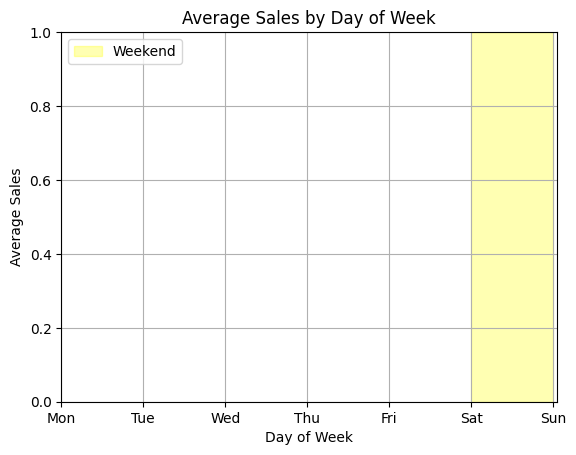

In [ ]:
# Highlight weekends (Saturday and Sunday)
plt.axvspan(5, 6, color='yellow', alpha=0.3, label='Weekend')

plt.title("Average Sales by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Sales")
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
# Which stores are opened on all weekdays?
store_open_All_weekdays = train[train["Open"] == 1].groupby("Store")["DayOfWeek"].nunique()
print(store_open_All_weekdays)

Store
1       6
2       6
3       6
4       6
5       6
       ..
1111    6
1112    6
1113    6
1114    6
1115    6
Name: DayOfWeek, Length: 1115, dtype: int64


In [ ]:
store_open_All_weekdays.value_counts()

,count
DayOfWeek,
6,1082
7,33


1082 store open 6 days
and 33 stores open 7 days

In [ ]:
# Get Friday's sales
friday_sales = train[train["DayOfWeek"] == 5]["Sales"].mean()

# Get Sunday's sales
sunday_sales = train[train["DayOfWeek"] == 7]["Sales"].mean()

# Calculate the difference (Sunday - Friday)
sunday_sales_difference = sunday_sales - friday_sales

print(f"Sunday Sales Difference from Friday: {sunday_sales_difference:.2f}")

Sunday Sales Difference from Friday: -6519.09


# Merge store data with train data

In [ ]:
df_merge=pd.merge(train,df,on='Store')

In [ ]:
#Store Type and Sales Exploration
store_type = df_merge.groupby("StoreType")[["Sales","Customers"]].sum().reset_index()
store_type.sort_values(["Sales","Customers"], ascending= False, inplace = True) # sorting into descending order to get higher values
store_type

,StoreType,Sales,Customers
0,0,3165334859,363541434
3,3,1765392943,156904995
2,2,783221426,92129705
1,1,159231395,31465621


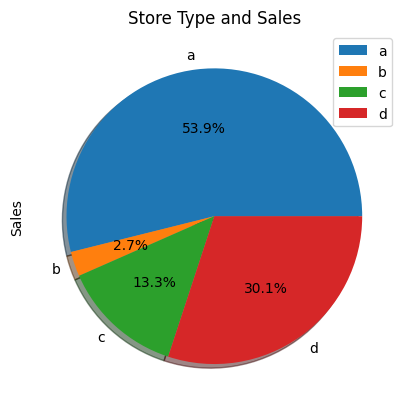

In [ ]:
#let's explore store type a bit and it's influence on sales
df_merge.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()


This pie chart represents the distribution of sales across different store types (a, b, c, d). Each segment shows the percentage of total sales contributed by each store type.

Since store type 'a' dominates sales, it may indicate larger store sizes, better location, or a more attractive product assortment.

Store type 'b' has very low sales, which suggests low customer traffic, fewer stores, or ineffective marketing.

Store type 'd' has a strong presence, showing that it plays a key role in the overall business.

Store type 'c' has a moderate sales share, indicating that it performs better than 'b' but significantly lower than 'a' and 'd'.

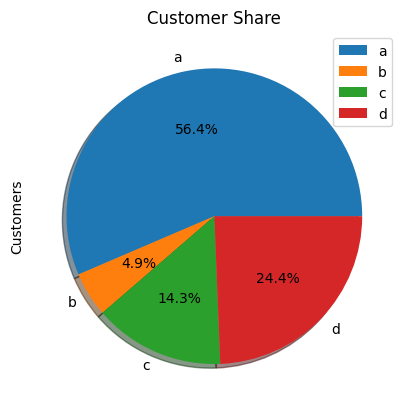

In [ ]:
#customers and store type
df_merge.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

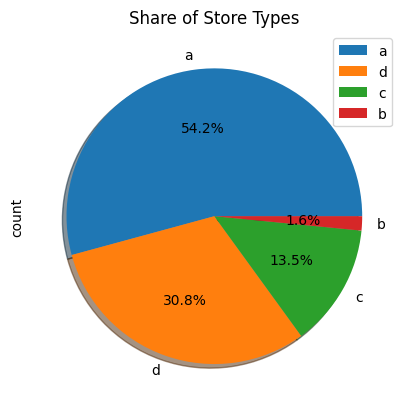

In [ ]:
#store types in all of the dataset
df_merge["StoreType"].value_counts().plot.pie(title='Share of Store Types', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

Observation:¶
A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle. Earlier it was seen that the store type b had the highest sales on an average because the default estimation function to the barplot is mean.

But upon further exploration it can be clearly observed that the highest sales belonged to the store type a due to the high number of type a stores in our dataset. Store type a and c had a similar kind of sales and customer share.

Interesting insight to note is that store type b with highest average sales and per store revenue generation looks healthy and a reason for that would be all three kinds of assortment strategies involved which was seen earlier.

In [ ]:
assortment_sales = df_merge.groupby('Assortment')[['Sales']].mean()
assortment_sales

,Sales
Assortment,
a,5481.026096
b,8553.931999
c,6058.676567


<Axes: xlabel='Assortment', ylabel='Sales'>

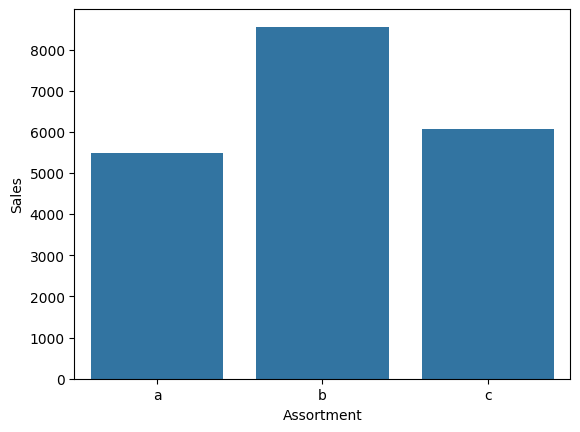

In [ ]:
sns.barplot(x=assortment_sales.index,y=assortment_sales['Sales'])

In [ ]:
#How does the distance to the next competitor affect sales? What if the store a
#its competitors all happen to be in city centres, does the distance matter in that case?
competitor= df_merge.groupby('CompetitionDistance')[['Sales']].mean()
competitor

,Sales
CompetitionDistance,
20.0,4861.790870
30.0,4659.587470
40.0,6212.659448
50.0,8072.697452
60.0,7816.121373
...,...
45740.0,6646.681529
46590.0,3773.877919
48330.0,4032.547771


In [ ]:
# # Filtering stores located in city centers (Assumption: CompetitionDistance ≤ 1000)
city_center_stores = df_merge[df_merge["CompetitionDistance"] <= 1000]

correlation = city_center_stores["CompetitionDistance"].corr(city_center_stores["Sales"])

sales_by_distance = city_center_stores.groupby("CompetitionDistance")["Sales"].mean().reset_index()

print(sales_by_distance.head(10))

   CompetitionDistance        Sales
0                 20.0  4861.790870
1                 30.0  4659.587470
2                 40.0  6212.659448
3                 50.0  8072.697452
4                 60.0  7816.121373
5                 70.0  6667.511268
6                 80.0  5269.674098
7                 90.0  7494.269184
8                100.0  5271.668790
9                110.0  5800.739576


In [ ]:
correlation = city_center_stores["CompetitionDistance"].corr(city_center_stores["Sales"])
correlation


-0.08861236343365786

The correlation between Competition Distance and Sales is -0.09, which is very weak.

This suggests that CompetitionDistance does not strongly impact sales in city centers.

Sales fluctuate without a clear pattern, showing that competition is not the main deciding factor in city-center sales.

Stores at 50m and 60m Distance Perform the Best

#How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on has values for competitor distance


In [ ]:
new_competitor_affect=df_merge.groupby('CompetitionOpenSinceYear')[['Sales']].mean()
#new_competitor_affect

In [ ]:
#CompetitionOpenSinceMonth
new_competitor_affect=df_merge.groupby('CompetitionOpenSinceMonth')[['Sales']].mean()
#new_competitor_affect



In [ ]:
#New_competitor_opening_impact = sns.barplot(data=df_merge,x='CompetitionOpenSinceMonth',y='Sales').set_title('New competitor opening impact on sales')

The x-axis represents the month (1-12) when a competitor opened.

The y-axis represents sales.

Each bar shows the average sales for stores based on the month a competitor opened, with small error bars representing variability.

Highest Sales: Stores with competitors opening in months 5, 6, and 9 seem to have slightly higher sales.

Lowest Sales: When competitors opened in 2, 3, 10, and 11, sales appear lower.

##Task 2 - Prediction of store sales


In [ ]:
weekdays

,Sales
DayOfWeek,
1,7809.044510
2,7005.244467
3,6555.884138
4,6247.575913
5,6723.274305
6,5847.562599
7,204.183189


In [ ]:
from datetime import datetime

# Define the next holiday date (e.g., Christmas)
holiday_date = datetime(2025, 3, 10)  # Change this to your desired holiday

# Get today's date
today = datetime.today()

# Calculate the difference
days_until_holiday = (holiday_date - today).days

# Print the result
print(f"Days until holiday: {days_until_holiday}")


Days until holiday: -8


In [ ]:
from datetime import datetime

# List of upcoming holidays
holidays = [
    {"name": "Independence Day", "date": datetime(2025, 7, 4)},
    {"name": "Thanksgiving", "date": datetime(2025, 11, 27)},
    {"name": "Christmas", "date": datetime(2025, 12, 25)},
]

# Get today's date
today = datetime.today()

# Find the next holiday
upcoming_holiday = min(
    [h for h in holidays if h["date"] > today],
    key=lambda x: x["date"],
    default=None
)

if upcoming_holiday:
    days_left = (upcoming_holiday["date"] - today).days
    print(f"The next holiday is {upcoming_holiday['name']} in {days_left} days.")
else:
    print("No upcoming holidays this year.")


The next holiday is Independence Day in 108 days.


In [ ]:
from datetime import datetime

# Define the past holiday date (e.g., New Year)
Christmas_holiday_date = datetime(2024, 12, 25)  # Change this to your past holiday date

# Get today's date
today = datetime.today()

# Calculate the difference
days_after_holiday = (today - holiday_date).days

# Print the result
if days_after_holiday >= 0:
    print(f"{days_after_holiday} days have passed since the holiday.")
else:
    print(f"The holiday is in {-days_after_holiday} days.")


7 days have passed since the holiday.


In [ ]:
from datetime import datetime, timedelta
import calendar

# Get today's date
today = datetime.today()
year, month = today.year, today.month

# Beginning of the month
beginning_of_month = datetime(year, month, 1)

# End of the month
last_day = calendar.monthrange(year, month)[1]  # Get last day of the month
end_of_month = datetime(year, month, last_day)

# Mid of the month (approximate: 15th or middle day)
mid_of_month = datetime(year, month, (last_day // 2))

# Print the dates
print(f"Beginning of Month: {beginning_of_month}")
print(f"End of Month: {end_of_month}")
print(f"Mid of Month: {mid_of_month}")


Beginning of Month: 2025-03-01 00:00:00
End of Month: 2025-03-31 00:00:00
Mid of Month: 2025-03-15 00:00:00


In [ ]:
categorical_columns=df_merge.select_dtypes(include='object')
categorical_columns.head(4)

,StateHoliday,Before_Holiday,After_Holiday,During_Holiday,Holiday_Period,StoreType,Assortment,PromoInterval
0,0,0,0,0,Regular,c,a,"Jan,Apr,Jul,Oct"
1,0,0,0,0,Regular,a,a,"Jan,Apr,Jul,Oct"
2,0,0,0,0,Regular,a,a,"Jan,Apr,Jul,Oct"
3,0,0,0,0,Regular,c,c,"Jan,Apr,Jul,Oct"


In [ ]:
numerical_columns=df_merge.select_dtypes(exclude='object')
#numerical_columns.head(4)

In [ ]:
#change data type of object to string

df_merge['StateHoliday'] = df_merge['StateHoliday'].astype(str)
df_merge['After_Holiday'] = df_merge['After_Holiday'].astype(str)
df_merge['Before_Holiday'] = df_merge['Before_Holiday'].astype(str)
df_merge['During_Holiday'] = df_merge['During_Holiday'].astype(str)

In [ ]:
#encoding of categorical column
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df_merge['StoreType']=label_encoder.fit_transform(df_merge['StoreType'])
df_merge['Assortment']=label_encoder.fit_transform(df_merge['Assortment'])
df_merge['PromoInterval']=label_encoder.fit_transform(df_merge['PromoInterval'])
df_merge['Holiday_Period']=label_encoder.fit_transform(df_merge['Holiday_Period'])
df_merge['StateHoliday']=label_encoder.fit_transform(df_merge['StateHoliday'])
df_merge['After_Holiday']=label_encoder.fit_transform(df_merge['After_Holiday'])
df_merge['Before_Holiday']=label_encoder.fit_transform(df_merge['Before_Holiday'])
df_merge['During_Holiday']=label_encoder.fit_transform(df_merge['During_Holiday'])


In [ ]:
# Convert 'Date' column to numerical features (e.g., ordinal)
import datetime as dt
df_merge['Date'] = df_merge['Date'].map(dt.datetime.toordinal)


In [ ]:
# Drop the original 'Date' column
df_merge = df_merge.drop('Date', axis=1)